tl;dr : *Inférence du transfert des voix entre candidats.*

On peut obtenir librement les résultats des [premier](https://www.data.gouv.fr/fr/datasets/election-presidentielle-des-10-et-24-avril-2022-resultats-definitifs-du-1er-tour/) et [second](https://www.data.gouv.fr/fr/datasets/election-presidentielle-des-10-et-24-avril-2022-resultats-definitifs-du-2nd-tour/) tours.

Inspirés par cet [article du Monde](https://www.lemonde.fr/les-decodeurs/article/2022/05/04/election-presidentielle-2022-quels-reports-de-voix-entre-les-deux-tours_6124672_4355770.html)
Le but est d'ici obtenir une estimation 
<!-- TEASER_END -->


## Collecte des données

On va utiliser les données disponibles sur https://www.data.gouv.fr en se concentrant sur les résultats définitifs par bureau de vote.

In [4]:
import numpy as np
import pandas as pd

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

In [10]:
url = 'https://static.data.gouv.fr/resources/election-presidentielle-des-10-et-24-avril-2022-resultats-definitifs-du-1er-tour/20220414-152612/resultats-par-niveau-burvot-t1-france-entiere.xlsx' # XLSX
T1 = pd.read_excel(url)
T1.tail()

,Code du département,Libellé du département,Code de la circonscription,Libellé de la circonscription,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,...,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104
69677,ZZ,Français établis hors de France,6,6ème circonscription,229,Zurich,0001,24868,14101,56.70,...,47,0.19,0.44,12,M,DUPONT-AIGNAN,Nicolas,189,0.76,1.77
69678,ZZ,Français établis hors de France,11,11ème circonscription,231,Taipei,0001,1709,942,55.12,...,10,0.59,1.32,12,M,DUPONT-AIGNAN,Nicolas,10,0.59,1.32
69679,ZZ,Français établis hors de France,11,11ème circonscription,233,Nour-Soultan,0001,117,64,54.70,...,0,0.00,0.00,12,M,DUPONT-AIGNAN,Nicolas,1,0.85,1.96
69680,ZZ,Français établis hors de France,2,2ème circonscription,234,Monterrey,0001,713,553,77.56,...,1,0.14,0.63,12,M,DUPONT-AIGNAN,Nicolas,1,0.14,0.63
69681,ZZ,Français établis hors de France,2,2ème circonscription,235,Bahamas (Nassau),0001,136,78,57.35,...,0,0.00,0.00,12,M,DUPONT-AIGNAN,Nicolas,1,0.74,1.82


In [12]:
T1.columns

Index(['Code du département', 'Libellé du département',
       'Code de la circonscription', 'Libellé de la circonscription',
       'Code de la commune', 'Libellé de la commune', 'Code du b.vote',
       'Inscrits', 'Abstentions', '% Abs/Ins',
       ...
       'Unnamed: 95', 'Unnamed: 96', 'Unnamed: 97', 'Unnamed: 98',
       'Unnamed: 99', 'Unnamed: 100', 'Unnamed: 101', 'Unnamed: 102',
       'Unnamed: 103', 'Unnamed: 104'],
      dtype='object', length=105)

In [35]:
T1.columns[:23]

Index(['Code du département', 'Libellé du département',
       'Code de la circonscription', 'Libellé de la circonscription',
       'Code de la commune', 'Libellé de la commune', 'Code du b.vote',
       'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins',
       'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins',
       '% Nuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot', 'N°Panneau',
       'Sexe'],
      dtype='object')

In [9]:
np.unique(T2['Code de la commune'])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [108]:
df = T1[['Nuls', 'Blancs', 'Abstentions', 'Code de la commune', 'Code du b.vote']].copy()
df.head()

,Nuls,Abstentions,Code de la commune,Code du b.vote
0,1,108,1,0001
1,1,38,2,0001
2,5,266,4,0001
3,6,265,4,0002
4,8,246,4,0003


In [153]:
df_1 = T1[['Nuls', 'Blancs', 'Abstentions']].copy()
#df_1 = df_1.rename(columns={"Nuls": "1_Nuls", "Abstentions": "1_Abstentions"})
df_1.head()

,Nuls,Abstentions
0,1,108
1,1,38
2,5,266
3,6,265
4,8,246


In [154]:
df_1

,Nuls,Abstentions
0,1,108
1,1,38
2,5,266
3,6,265
4,8,246
...,...,...
69677,31,14101
69678,2,942
69679,0,64
69680,2,553


In [130]:
code_commune =  T1['Code de la commune'].values.astype(str).copy()
code_commune

array(['1', '2', '4', ..., '233', '234', '235'], dtype='<U21')

In [131]:
code_bdv =  T1['Code du b.vote'].values.astype(str).copy()
code_bdv

array(['0001', '0001', '0001', ..., '0001', '0001', '0001'], dtype='<U4')

In [132]:
code_bdv.astype(str)

array(['0001', '0001', '0001', ..., '0001', '0001', '0001'], dtype='<U4')

In [133]:
code_commune + code_bdv

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U21'), dtype('<U4')) -> None

In [134]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69682 entries, 0 to 69681
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   1_Nuls         69682 non-null  int64
 1   1_Abstentions  69682 non-null  int64
dtypes: int64(2)
memory usage: 1.1 MB
None


## extraction des résultats

In [135]:
col_start = 23
col_par_cdt = 7
candidats = T1.iloc[0][col_start::col_par_cdt]
candidats

Nom                   ARTHAUD
Unnamed: 30           ROUSSEL
Unnamed: 37            MACRON
Unnamed: 44          LASSALLE
Unnamed: 51            LE PEN
Unnamed: 58           ZEMMOUR
Unnamed: 65         MÉLENCHON
Unnamed: 72           HIDALGO
Unnamed: 79             JADOT
Unnamed: 86          PÉCRESSE
Unnamed: 93            POUTOU
Unnamed: 100    DUPONT-AIGNAN
Name: 0, dtype: object

In [136]:
résultats = T1.iloc[0][(col_start+2)::col_par_cdt]
résultats

Voix              3
Unnamed: 32       6
Unnamed: 39     150
Unnamed: 46      18
Unnamed: 53     149
Unnamed: 60      43
Unnamed: 67      66
Unnamed: 74       5
Unnamed: 81      30
Unnamed: 88      26
Unnamed: 95       3
Unnamed: 102     21
Name: 0, dtype: object

In [155]:
for i_candidat, candidat in enumerate(candidats):
    i_col = col_start + i_candidat*col_par_cdt + 2
    print(i_col, T1.iloc[:, i_col].values)
    df_1[candidat] = T1.iloc[:, i_col].values

25 [3 2 4 ... 0 0 0]
32 [ 6  7 30 ...  1  1  1]
39 [150  50 159 ...  25  96  25]
46 [18 10 24 ...  1  1  0]
53 [149  23 237 ...   3   4   3]
60 [43 14 69 ...  7 18 17]
67 [ 66  41 216 ...   9  19   2]
74 [ 5  3 15 ...  0  2  0]
81 [30 10 25 ...  4 10  0]
88 [26  8 40 ...  0  5  6]
95 [3 3 8 ... 0 1 0]
102 [21  0 13 ...  1  1  1]


In [156]:
T1.iloc[:, i_col]

0         21
1          0
2         13
3         20
4         19
        ... 
69677    189
69678     10
69679      1
69680      1
69681      1
Name: Unnamed: 102, Length: 69682, dtype: int64

In [157]:
T1.iloc[:, i_col].values

array([21,  0, 13, ...,  1,  1,  1])

In [158]:
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69682 entries, 0 to 69681
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Nuls           69682 non-null  int64
 1   Abstentions    69682 non-null  int64
 2   ARTHAUD        69682 non-null  int64
 3   ROUSSEL        69682 non-null  int64
 4   MACRON         69682 non-null  int64
 5   LASSALLE       69682 non-null  int64
 6   LE PEN         69682 non-null  int64
 7   ZEMMOUR        69682 non-null  int64
 8   MÉLENCHON      69682 non-null  int64
 9   HIDALGO        69682 non-null  int64
 10  JADOT          69682 non-null  int64
 11  PÉCRESSE       69682 non-null  int64
 12  POUTOU         69682 non-null  int64
 13  DUPONT-AIGNAN  69682 non-null  int64
dtypes: int64(14)
memory usage: 7.4 MB
None


In [98]:
df_1['1_POUTOU']

0         3
1         3
2         8
3         4
4         3
         ..
69677    47
69678    10
69679     0
69680     1
69681     0
Name: 1_POUTOU, Length: 69682, dtype: int64

In [159]:
len(df_1), df_1.sum(), df_1.sum().sum()

(69682,
 Nuls               247151
 Abstentions      12824169
 ARTHAUD            197094
 ROUSSEL            802422
 MACRON            9783058
 LASSALLE          1101387
 LE PEN            8133828
 ZEMMOUR           2485226
 MÉLENCHON         7712520
 HIDALGO            616478
 JADOT             1627853
 PÉCRESSE          1679001
 POUTOU             268904
 DUPONT-AIGNAN      725176
 dtype: int64,
 48204267)

pandas barplot of sum of columns

In [ ]:
import matplotlib.pyplot as plt

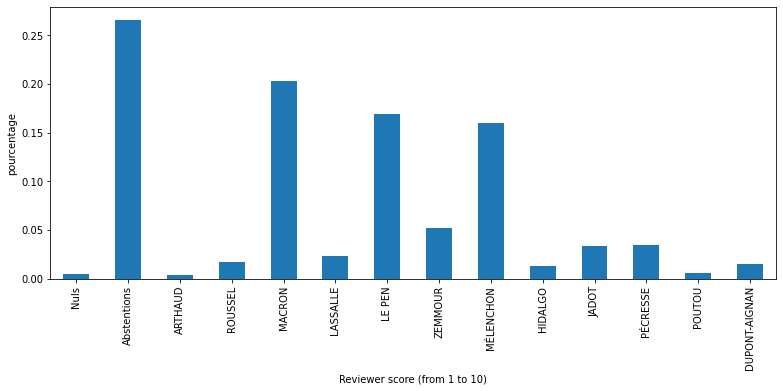

In [161]:
fig, ax = plt.subplots(figsize=(13, 5))
k = df_1.sum()/df_1.sum().sum()
ax = k.plot.bar(ax=ax)
ax.set_xlabel('Reviewer score (from 1 to 10)')
#ax.set_xlim(1, 10)
#ax.set_xticks(np.arange(1, 10)+.5)
#ax.set_xticklabels(np.arange(1, 10))
ax.set_ylabel('pourcentage');

## 2ème tour

In [162]:
url = 'https://static.data.gouv.fr/resources/election-presidentielle-des-10-et-24-avril-2022-resultats-definitifs-du-2nd-tour/20220428-142301/resultats-par-niveau-burvot-t2-france-entiere.xlsx' # XLSX
T2 = pd.read_excel(url)
T2.tail()

,Code du département,Libellé du département,Code de la circonscription,Libellé de la circonscription,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,...,Voix,% Voix/Ins,% Voix/Exp,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
69677,ZZ,Français établis hors de France,6,6ème circonscription,229,Zurich,0001,24867,13153,52.89,...,10166,40.88,88.88,2,F,LE PEN,Marine,1272,5.12,11.12
69678,ZZ,Français établis hors de France,11,11ème circonscription,231,Taipei,0001,1703,928,54.49,...,611,35.88,82.23,2,F,LE PEN,Marine,132,7.75,17.77
69679,ZZ,Français établis hors de France,11,11ème circonscription,233,Nour-Soultan,0001,117,64,54.70,...,39,33.33,78.00,2,F,LE PEN,Marine,11,9.40,22.00
69680,ZZ,Français établis hors de France,2,2ème circonscription,234,Monterrey,0001,715,510,71.33,...,181,25.31,89.60,2,F,LE PEN,Marine,21,2.94,10.40
69681,ZZ,Français établis hors de France,2,2ème circonscription,235,Bahamas (Nassau),0001,137,78,56.93,...,35,25.55,68.63,2,F,LE PEN,Marine,16,11.68,31.37


In [163]:
T2.columns

Index(['Code du département', 'Libellé du département',
       'Code de la circonscription', 'Libellé de la circonscription',
       'Code de la commune', 'Libellé de la commune', 'Code du b.vote',
       'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins',
       'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins',
       '% Nuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot', 'N°Panneau', 'Sexe',
       'Nom', 'Prénom', 'Voix', '% Voix/Ins', '% Voix/Exp', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34'],
      dtype='object')

In [164]:
T2.columns[:23]

Index(['Code du département', 'Libellé du département',
       'Code de la circonscription', 'Libellé de la circonscription',
       'Code de la commune', 'Libellé de la commune', 'Code du b.vote',
       'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins',
       'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins',
       '% Nuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot', 'N°Panneau',
       'Sexe'],
      dtype='object')

In [166]:
T2.columns[23:]

Index(['Nom', 'Prénom', 'Voix', '% Voix/Ins', '% Voix/Exp', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34'],
      dtype='object')

In [167]:
T2.iloc[0, 23:]

Nom              MACRON
Prénom         Emmanuel
Voix                237
% Voix/Ins        36.86
% Voix/Exp        52.67
Unnamed: 28           2
Unnamed: 29           F
Unnamed: 30      LE PEN
Unnamed: 31      Marine
Unnamed: 32         213
Unnamed: 33       33.13
Unnamed: 34       47.33
Name: 0, dtype: object

In [168]:
col_start = 23
col_par_cdt = 7
candidats = T2.iloc[0][col_start::col_par_cdt]
candidats

Nom            MACRON
Unnamed: 30    LE PEN
Name: 0, dtype: object

In [165]:
df_2 = T2[['Nuls', 'Blancs', 'Abstentions']].copy()
#df_1 = df_1.rename(columns={"Nuls": "1_Nuls", "Abstentions": "1_Abstentions"})
df_2.head()

,Nuls,Blancs,Abstentions
0,1,16,108
1,1,3,38
2,5,18,266
3,6,15,265
4,8,10,246


In [169]:
for i_candidat, candidat in enumerate(candidats):
    i_col = col_start + i_candidat*col_par_cdt + 2
    print(i_col, T2.iloc[:, i_col].values)
    df_2[candidat] = T2.iloc[:, i_col].values

25 [237  94 360 ...  39 181  35]
32 [213  48 355 ...  11  21  16]


In [170]:
df_2.head()

,Nuls,Blancs,Abstentions,MACRON,LE PEN
0,1,16,108,237,213
1,1,3,38,94,48
2,5,18,266,360,355
3,6,15,265,426,327
4,8,10,246,449,353


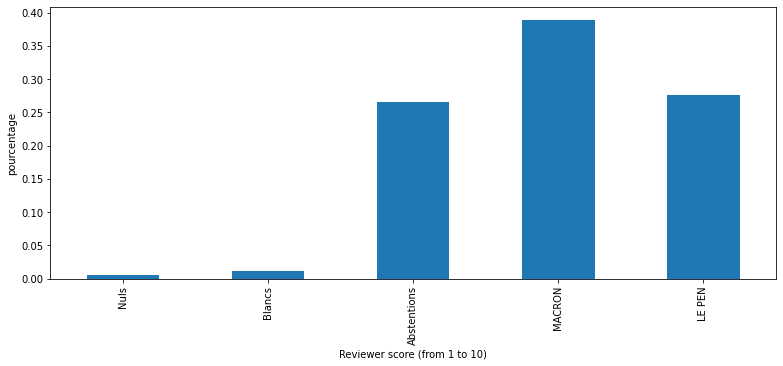

In [171]:
fig, ax = plt.subplots(figsize=(13, 5))
k = df_2.sum()/df_2.sum().sum()
ax = k.plot.bar(ax=ax)
ax.set_xlabel('Reviewer score (from 1 to 10)')
#ax.set_xlim(1, 10)
#ax.set_xticks(np.arange(1, 10)+.5)
#ax.set_xticklabels(np.arange(1, 10))
ax.set_ylabel('pourcentage');

## statistiques de second ordre

In [175]:
df_12 = pd.DataFrame()

In [176]:
df_12['1_MÉLENCHON'] = df_1['MÉLENCHON'].copy()
df_12['MACRON'] = df_2['MACRON'].copy()

In [177]:
df_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69682 entries, 0 to 69681
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   1_MÉLENCHON  69682 non-null  int64
 1   MACRON       69682 non-null  int64
dtypes: int64(2)
memory usage: 1.1 MB


In [178]:
df_12['1_MÉLENCHON'] = df_12['1_MÉLENCHON']/df_1.sum(axis=1)
df_12['MACRON'] = df_12['MACRON']/df_2.sum(axis=1)

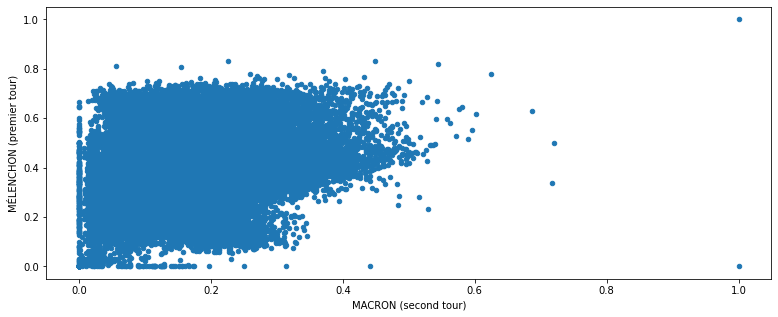

In [181]:
fig, ax = plt.subplots(figsize=(13, 13))
ax = df_12.plot.scatter(x='1_MÉLENCHON', y ='MACRON', ax=ax)
ax.set_xlabel('MACRON (second tour)')
#ax.set_xlim(1, 10)
#ax.set_xticks(np.arange(1, 10)+.5)
#ax.set_xticklabels(np.arange(1, 10))
ax.set_ylabel('MÉLENCHON (premier tour)');

In [182]:
df_2.head()

,Nuls,Blancs,Abstentions,MACRON,LE PEN
0,1,16,108,237,213
1,1,3,38,94,48
2,5,18,266,360,355
3,6,15,265,426,327
4,8,10,246,449,353


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


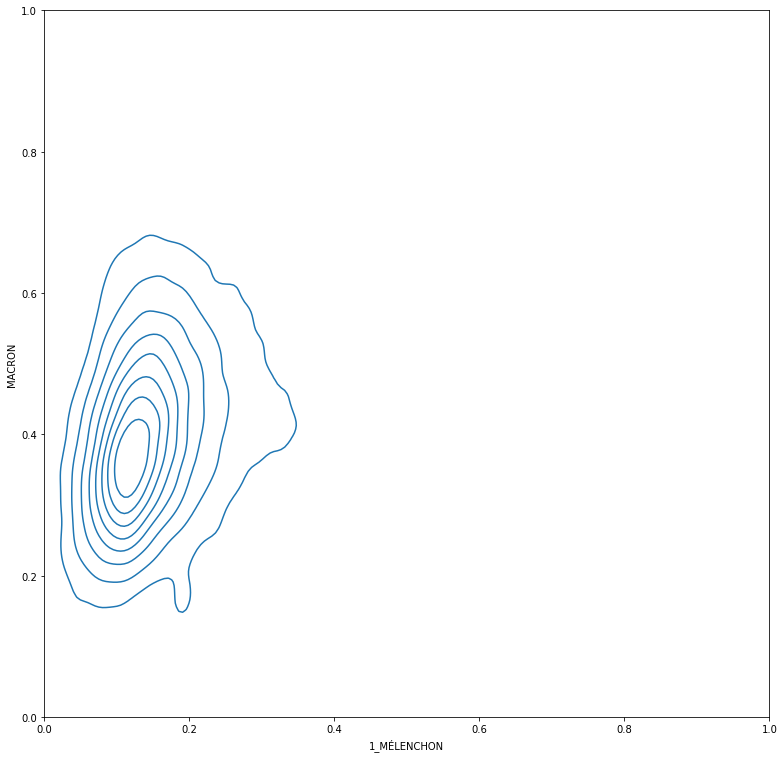

In [192]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(13, 13))
ax = sns.kdeplot(df_12['1_MÉLENCHON'], df_12['MACRON'], thresh=0, levels=10, cbar=False, clip=(0, 1), ax=ax)

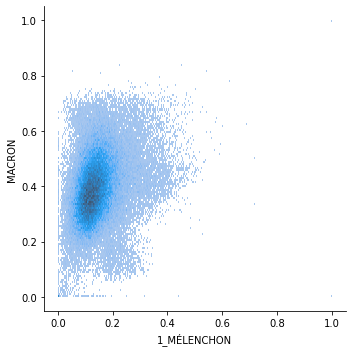

In [200]:
#fig, ax = plt.subplots(figsize=(13, 13))
sns.displot(df_12, x='1_MÉLENCHON', y='MACRON')

<AxesSubplot:xlabel='1_MÉLENCHON', ylabel='MACRON'>

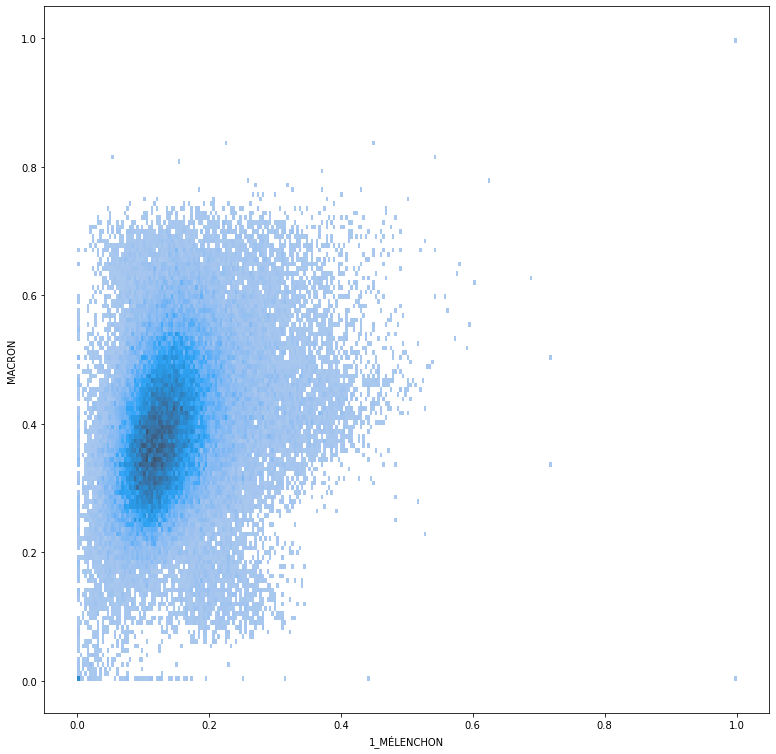

In [196]:
fig, ax = plt.subplots(figsize=(13, 13))
sns.histplot(df_12, x='1_MÉLENCHON', y='MACRON', ax=ax) # bins=np.linspace(0, 1, 32), 

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


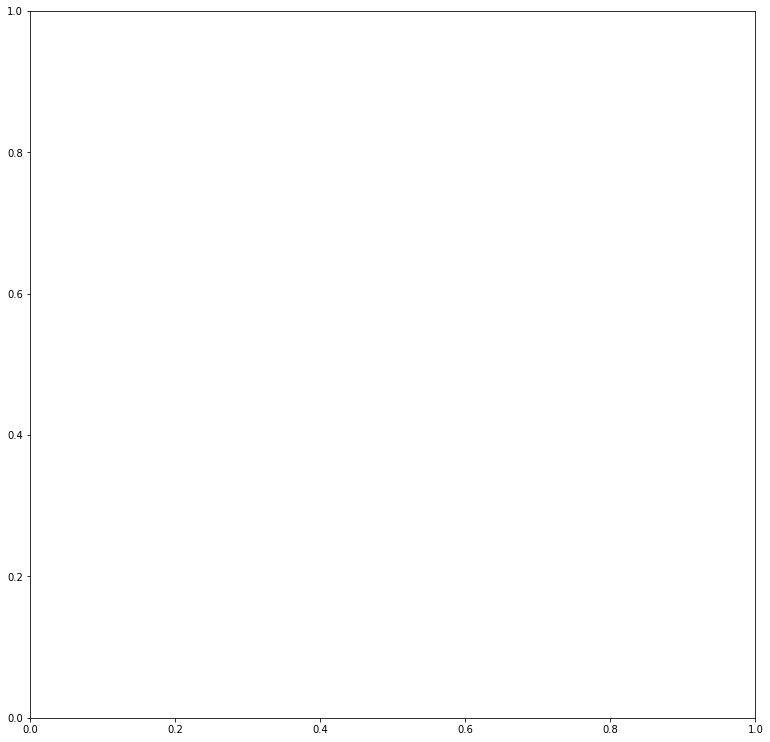

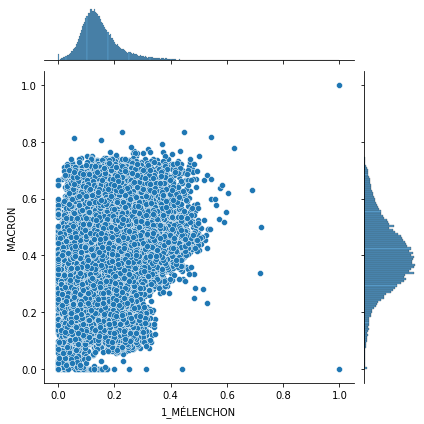

In [202]:
fig, ax = plt.subplots(figsize=(13, 13))
sns.jointplot(df_12['1_MÉLENCHON'], df_12['MACRON'], ax=ax) # bins=np.linspace(0, 1, 32), 

https://laurentperrinet.github.io/sciblog/posts/2022-02-11-cosyne-reviewer-feedback.html